In [132]:
def apdrawer(limitc):
    intgrid=limitc*1
    down=[];up=[];left=[];right=[]
    for i, eachline in enumerate(intgrid):
        for j, each in enumerate(eachline):
            if each==1:
                down.append([[j,j+1],[i,i]])
                up.append([[j,j+1],[i+1,i+1]])
                left.append([[j,j],[i,i+1]])
                right.append([[j+1,j+1],[i,i+1]])

    together=[]
    for each in down: together.append(each)
    for each in up: together.append(each)
    for each in left: together.append(each)
    for each in right: together.append(each)

    filtered=[]
    for each in together:
        c=0
        for EACH in together:
            if each==EACH:
                c+=1
        if c==1:
            filtered.append(each)
            
    return filtered

In [133]:
import matplotlib.pyplot as plt
from lightkurve import TessTargetPixelFile
import numpy as np

In [134]:
!pwd

/home/szabopal/PycharmProjects/halophot2


In [135]:
import glob

In [136]:
csillaglist=glob.glob('SO/masikcsillag/*fits')

In [137]:
zeros=np.zeros(tpf_s1.flux[0].shape)

In [138]:
~(zeros<1)*1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [139]:
aper=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [140]:
import warnings
warnings.filterwarnings("ignore")

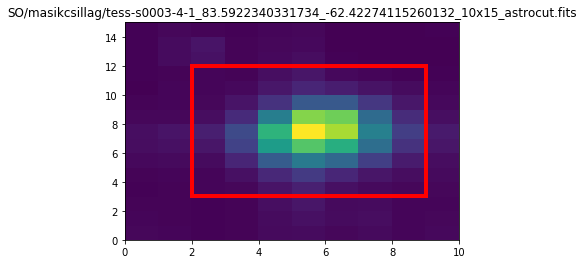

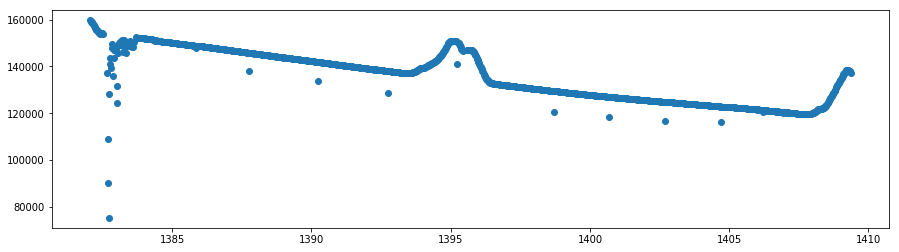

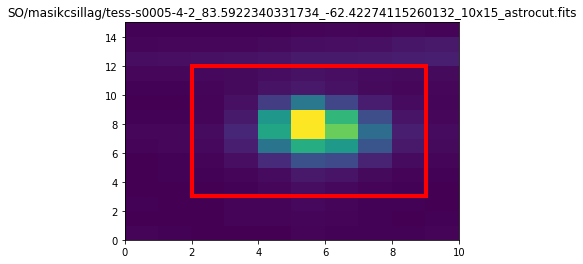

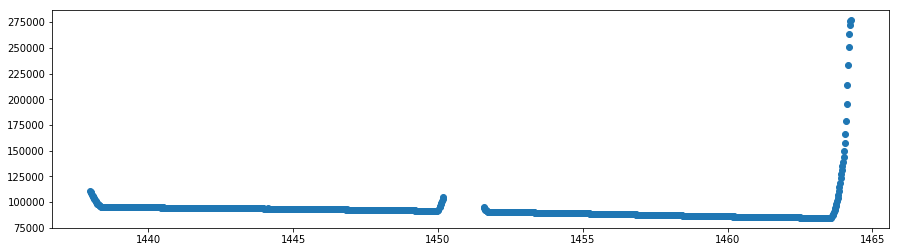

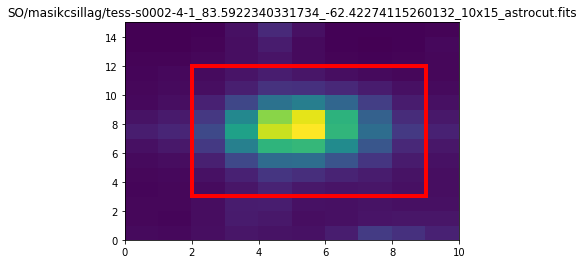

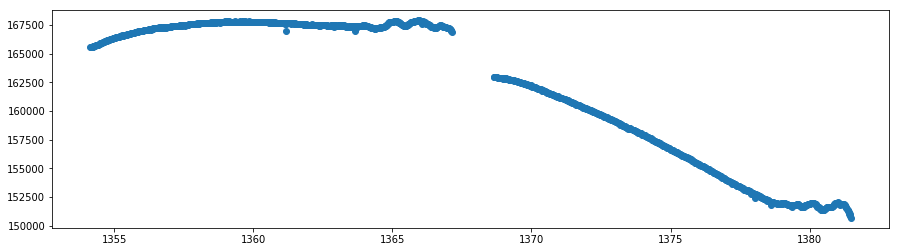

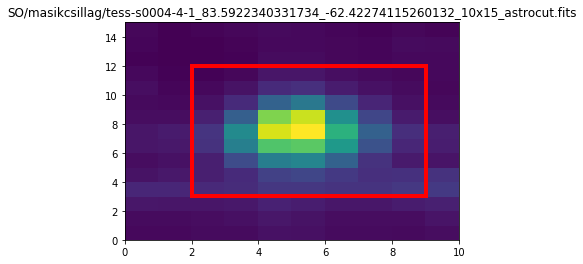

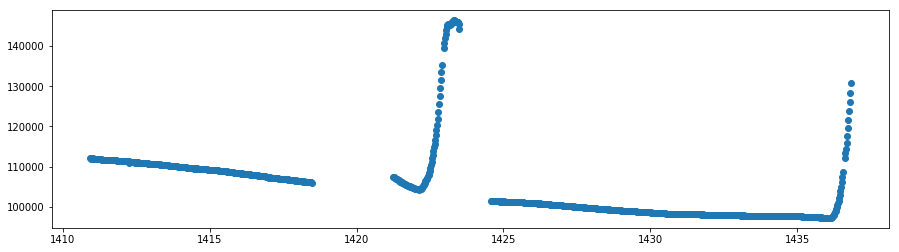

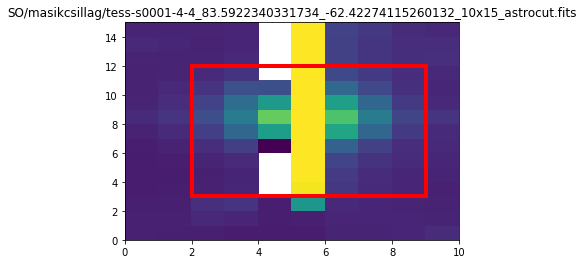

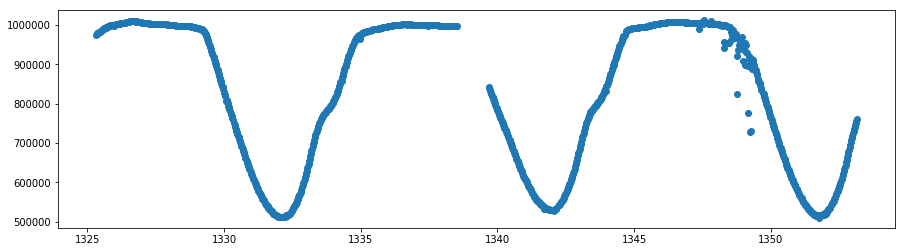

In [144]:
for i, e in enumerate(csillaglist):
    if i<5:
        sector1ffi_cutout=csillaglist[i]
        tpf = TessTargetPixelFile(sector1ffi_cutout)

        plt.pcolormesh(np.log(tpf.flux[0]))
        
        filtered=apdrawer(aper)
        for x in range(len(filtered)):
            plt.plot(filtered[x][0],filtered[x][1],c='red', linewidth=4)

        plt.title(e)
        plt.show()
        
        lc=[]
        for each in tpf.flux:
            lc.append(sum(sum(each*aper)))
            
        plt.figure(figsize=(15,4))
        plt.scatter(tpf.time,lc)
        plt.show()
                
        fout=open(e+'.lc.txt','w')
        fout.write('#time flux\n')
        for index, each in enumerate(tpf.time):
            fout.write(str(each)+' ')
            fout.write(str(lc[index])+'\n')
        fout.close()